### Maestría en Inteligencia Artificial Aplicada¶
### Curso: Inteligencia Artificial y Aprendizaje Automático
### Tecnológico de Monterrey
### Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
### **Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

* Mateo Cruz Lanchero - A01793882
* Jorge Bermúdez Tellería - A01793818  
* Humberto Alonso Torres Hernández - A01793682
* Jorge Arturo Federico Rivera - A01250724  
* Abraham Cabanzo Jiménez  - A01794355


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:

import requests
from zipfile import ZipFile
from io import BytesIO
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    RepeatedStratifiedKFold,
    learning_curve,
    validation_curve,
    GridSearchCV,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, make_scorer, ConfusionMatrixDisplay
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer

from scipy import stats
from sklearn import tree

import matplotlib.pyplot as plt
from tabulate import tabulate

from sklearn.compose import ColumnTransformer

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
r = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/00368/Facebook_metrics.zip")
zip_file = ZipFile(BytesIO(r.content))
df = pd.read_csv(zip_file.open("dataset_Facebook.csv"), sep = ";")
df.head(10)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
5,139441,Status,2,12,1,9,0.0,10472,20849,1191,1073,1389,16034,7852,1016,1,152.0,33.0,186
6,139441,Photo,3,12,1,3,1.0,11692,19479,481,265,364,15432,9328,379,3,249.0,27.0,279
7,139441,Photo,3,12,7,9,1.0,13720,24137,537,232,305,19728,11056,422,0,325.0,14.0,339
8,139441,Status,2,12,7,3,0.0,11844,22538,1530,1407,1692,15220,7912,1250,0,161.0,31.0,192
9,139441,Photo,3,12,6,10,0.0,4694,8668,280,183,250,4309,2324,199,3,113.0,26.0,142


El objetivo es determinar el impacto generado por un anuncio de una marca de cosméticos en 
Facebook, en el cual se intentaron varias variantes en la manera de mostrar el anuncio. Siguiendo el 
artículo, deberás considerar como predictores o variables de entrada aquellas que se indican en la Tabla 
3. Por otro lado, en la Tabla 2, los autores consideran varios casos para la variable de salida, intentando 
determinar cuál puede ser el mejor caso para medir el éxito de la campaña.  

### **Ejercicio-1.** 

En esta tarea considera únicamente la siguiente variable de salida que se concluye que es una de las 
mejores en el artículo antes citado:  ‘Lifetime People who have liked a Page and engaged with a 
post'. Renombra dicha variable como “LPE” . Como variables de entrada selecciona las 7 variables (category, page total likes, type, month, hour,
weekday, paid) que indican los autores en la Tabla 3 del artículo citado.

In [ ]:
df_y = df[["Lifetime People who have liked your Page and engaged with your post"]].copy()
df_y = df_y.rename(columns={"Lifetime People who have liked your Page and engaged with your post":"LPE"})
df_y.head(5)

,LPE
0,119
1,1108
2,132
3,1386
4,396


In [ ]:
df_X = df.copy()
df_X = df_X[["Category", "Page total likes", "Type", "Post Month" , "Post Hour" , "Post Weekday", "Paid"]].copy()
df_X

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid
0,2,139441,Photo,12,3,4,0.0
1,2,139441,Status,12,10,3,0.0
2,3,139441,Photo,12,3,3,0.0
3,2,139441,Photo,12,10,2,1.0
4,2,139441,Photo,12,3,2,0.0
...,...,...,...,...,...,...,...
495,3,85093,Photo,1,2,7,0.0
496,2,81370,Photo,1,8,5,0.0
497,1,81370,Photo,1,2,5,0.0
498,3,81370,Photo,1,11,4,0.0


### **Ejercicio-2.**

Realiza una partición de los datos con 100 datos de Prueba y el resto para entrenamiento y 
validación.  

In [ ]:
y = df_y
X = df_X


Xtv, Xtest, ytv, ytest = train_test_split(X, y, test_size=.2)

print(Xtv.shape, ': dimensión de datos de entrada "X" para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada "X" para prueba')  

print(ytv.shape, ': dimensión de variable de salida  "Y" para  entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida "Y" para prueba')

(400, 7) : dimensión de datos de entrada "X" para entrenamiento y validación
(100, 7) : dimensión de datos de entrada "X" para prueba
(400, 1) : dimensión de variable de salida  "Y" para  entrenamiento y validación
(100, 1) : dimensión de variable de salida "Y" para prueba


### **Ejercicio-3.**

Definirás tus propias funciones de errores para este problema de regresión. Los errores que 
utilizarás son la raíz cuadrada del error cuadrático medio RMSE, el error absoluto medio MAE y el 
error porcentual absoluto medio MAPE. 

In [ ]:
def mi_RMSE(y_act, y_pred):
    y_act, y_pred = np.array(y_act), np.array(y_pred)
    return (np.mean( (y_pred - y_act) **2 ))**(1/2)
    

# Incluye aquí las líneas de código que definan a la función: mi_MAE:

def mi_MAE(y_act, y_pred):
    y_act, y_pred = np.array(y_act), np.array(y_pred)
    return np.mean(np.abs(y_act - y_pred))


# Incluye aquí las líneas de código que definan a la función: mi_MAPE:

def mi_MAPE(y_act, y_pred):
    y_act, y_pred = np.array(y_act), np.array(y_pred)
    return np.mean(  abs(  (y_pred - y_act)/y_pred)  ) * 100
 

### **Ejercicio-4.**

En la página de la UCI, así como en el artículo de los autores previamente citado encuentras 
información en relación al significado de cada variable. Haz una análisis de tus datos y lleva a cabo 
las transformaciones que consideres adecuadas tanto en los datos de entrada, como en las de salida. 
Utiliza un Pipeline para evitar el filtrado de información. 

In [ ]:
df =  df_X.join(df_y) 
df

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid,LPE
0,2,139441,Photo,12,3,4,0.0,119
1,2,139441,Status,12,10,3,0.0,1108
2,3,139441,Photo,12,3,3,0.0,132
3,2,139441,Photo,12,10,2,1.0,1386
4,2,139441,Photo,12,3,2,0.0,396
...,...,...,...,...,...,...,...,...
495,3,85093,Photo,1,2,7,0.0,392
496,2,81370,Photo,1,8,5,0.0,301
497,1,81370,Photo,1,2,5,0.0,363
498,3,81370,Photo,1,11,4,0.0,370


Tipos de variables: 
Category              int64
Page total likes      int64
Type                 object
Post Month            int64
Post Hour             int64
Post Weekday          int64
Paid                float64
LPE                   int64
dtype: object
distribuciones de las variables: 


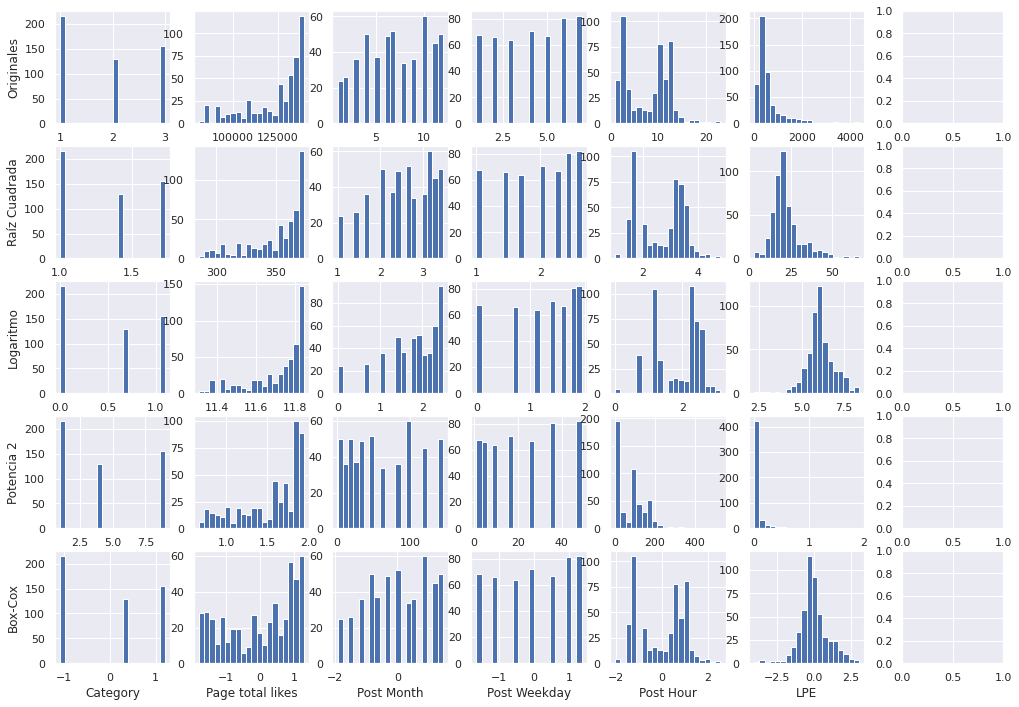

In [ ]:

variables_a_transformar = ['Category', 'Page total likes','Post Month','Post Weekday','Post Hour','LPE']

num_iterations = (int(len(variables_a_transformar)))

Plotdf = pd.DataFrame(df)
Plotdf.dropna(inplace=True)

print('Tipos de variables: ')
print(Plotdf.dtypes)
print('distribuciones de las variables: ')

sns.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(5, 8)    

for k in range(0,num_iterations):       
     # Datos originales ---------------------------------------------------------
    plt.subplot(5,7,k+1) 

    Transf0 = Plotdf[variables_a_transformar[k]]        #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
    plt.hist(Transf0,bins=20)                   #  En este línea agrega el comando para obtener el histograma de Transf0 con 20 barras (bins).

    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Originales')
    
    # Datos transformados con raíz cuadrada ------------------------------------
    plt.subplot(5,7,k+8)    

    Transf1 = np.sqrt(Plotdf[variables_a_transformar[k]] )          #  En esta línea se debe aplicar la raíz cuadrada a los valores de cada variable "k" sin transformar.
    plt.hist(Transf1,bins=20)                    #  En este línea agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).

    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Raíz Cuadrada')
    
    # Datos transformados con logaritmo natural --------------------------------
    plt.subplot(5,7,k+15)     

    Transf2 = np.log(Plotdf[variables_a_transformar[k]] )          #  En esta línea se debe aplicar el logaritmo natural a los valores de cada variable "k" sin transformar.
    plt.hist(Transf2,bins=20)                     #  En este línea agrega el comando para obtener el histograma de Transf2 con 20 barras (bins).

    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Logaritmo')
    
    # Datos transformados con la potencia de 2 ---------------------------------
    plt.subplot(5,7,k+22)

    Transf3 = np.square(Plotdf[variables_a_transformar[k]] )          #  En esta línea debes elevar al cuadrado los valores de cada variable "k" sin transformar.
    plt.hist(Transf3,bins=20)                   #  En este línea agrega el comando para obtener el histograma de Transf3 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Potencia 2')
    
    # Datos transformados con Box-Cox ------------------------------------------
    plt.subplot(5,7,k+29)

    Transf4 = power_transform(np.array(df[variables_a_transformar[k]]).reshape(-1,1),method="box-cox")          #  En esta línea se debe aplicar la transformación Box-Cox a los valores de cada variable "k" sin transformar.
    plt.hist(Transf4,bins=20)                    #En este línea agrega el comando para obtener el histograma de Transf4 con 20 barras (bins).

    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Box-Cox')

    # TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
    ################################################################################################################

plt.show()

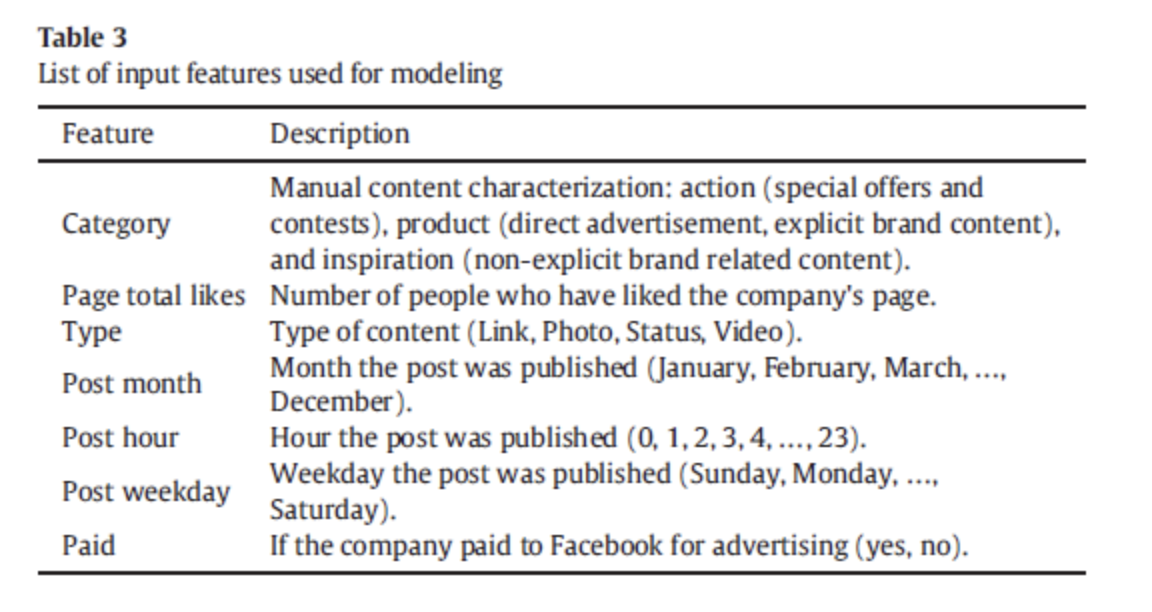

LPE = The number of people who have liked a Page and clicked anywhere in a post (Unique users)


In [ ]:
NumericList = ['Page total likes','Post Month','Post Weekday','Post Hour']
NumericalCategoricalList = ['Category']
StringCategoricalList = ['Type']
BinaryList = ['Paid']


NumericColumnsPipeline = Pipeline(steps= [('box-cox', PowerTransformer(method= 'box-cox')),
                                          ('NumericInputter', SimpleImputer(strategy='median'))])
NumericalCategoricalColumnsPipeline = Pipeline(steps= [('NumericalCategoricalInputter', 
                                                        SimpleImputer(strategy='most_frequent'))])

StringCategoricalPipeline =  Pipeline(steps= [('StringCategoricalInputter', 
                                       SimpleImputer(missing_values=None,strategy='most_frequent')),
                                      ('CategoricalOneHotEncoder', OneHotEncoder(handle_unknown = 'ignore'))]) 
                                                                                # drop = 'first'))])

BinaryColumnsPipeline = Pipeline(steps= [('BinaryInputter', SimpleImputer(strategy='most_frequent'))])


TransformColumns = ColumnTransformer(transformers = [
                                     ('Numerical',NumericColumnsPipeline,NumericList),
                                     ('NumericalCategorical',NumericalCategoricalColumnsPipeline,NumericalCategoricalList),
                                     ('StringCategorical',StringCategoricalPipeline,StringCategoricalList),
                                     ('Binary',BinaryColumnsPipeline,BinaryList)]
                                         ,remainder='passthrough')


XtrainFit = TransformColumns.fit(Xtv)
XtrainvalTransf = pd.DataFrame(XtrainFit.transform(Xtv))

New_Labels_X=['Page total likes','Post Month','Post Weekday','Post Hour','Category','Type_Like','Type_Photo','Type_Status','Type_Video','Paid']

XtrainvalTransf.columns = New_Labels_X
XtrainvalTransf 

,Page total likes,Post Month,Post Weekday,Post Hour,Category,Type_Like,Type_Photo,Type_Status,Type_Video,Paid
0,0.412619,0.007841,-0.023283,-1.145936,2.0,0.0,1.0,0.0,0.0,0.0
1,0.998346,1.184084,-1.070330,0.776419,1.0,0.0,1.0,0.0,0.0,1.0
2,-0.800542,-0.924658,-0.023283,1.442626,3.0,0.0,1.0,0.0,0.0,1.0
3,-0.079656,-0.296811,-1.663716,-0.817579,2.0,0.0,1.0,0.0,0.0,0.0
4,-0.691406,-0.607208,-0.530709,0.776419,3.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,-1.394464,-1.251187,-0.530709,-0.817579,1.0,0.0,1.0,0.0,0.0,0.0
396,-0.139742,-0.296811,-1.070330,-1.537792,1.0,0.0,1.0,0.0,0.0,0.0
397,-1.508561,-1.251187,0.928894,-0.270142,2.0,1.0,0.0,0.0,0.0,0.0
398,0.590559,0.307659,-0.023283,0.395553,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import FunctionTransformer

YList = ['LPE']

#Definimos piéline para y

YPipeline = Pipeline(steps = [('ybox-cox', FunctionTransformer(np.log, validate=False))])

#Definir el transformador de columna que aplica tuberías a la variable independiente

TransformColumnsY = ColumnTransformer(transformers = [('ynormalizing',YPipeline,YList)])

YtrainFit = TransformColumnsY.fit(ytv)
YtrainvalTransf = pd.DataFrame(YtrainFit.transform(ytv))
New_Labels_Y=['LPE']
YtrainvalTransf.columns = New_Labels_Y
YtrainvalTransf

,LPE
0,6.476972
1,5.659482
2,6.391917
3,6.167516
4,5.774552
...,...
395,5.998937
396,6.824374
397,4.521789
398,5.529429


### **Ejercicio-5.**

Utiliza la función Dummy para modelos de regresión de scikit-learn con el conjunto que tienes de 
datos de entrenamiento y validación. Para ello particiónalos en 100 para validación y 300 para 
entrenamiento. Encuentra los errores RMSE, MAE y MAPE para los conjuntos de entrenamiento y 
validación. Estos serán tus errores máximos que deberás tomar como referencia en el resto de la 
actividad. Consulta su documentación correspondiente:  
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html  

In [ ]:
Xtraintransf, Xvaltransf, Ytraintransf, Yvaltransf = train_test_split(XtrainvalTransf,YtrainvalTransf, train_size=.75, random_state=1)

#print(Xtv.shape     , ': dimensión de datos de entrada "X" para entrenamiento y validación')
print(Xtraintransf.shape , ': dimensión de datos de entrada "X" para entrenamiento ')
print(Xvaltransf.shape   , ': dimensión de datos de entrada "X" para validación')


#print(ytv.shape, ': dimensión de datos de salida "y" para entrenamiento y validación')
print(Ytraintransf.shape, ': dimensión de datos de salida "y" para entrenamiento ')
print(Yvaltransf.shape, ': dimensión de datos de salida "y" para validación')

Xtraintransf

(300, 10) : dimensión de datos de entrada "X" para entrenamiento 
(100, 10) : dimensión de datos de entrada "X" para validación
(300, 1) : dimensión de datos de salida "y" para entrenamiento 
(100, 1) : dimensión de datos de salida "y" para validación


,Page total likes,Post Month,Post Weekday,Post Hour,Category,Type_Like,Type_Photo,Type_Status,Type_Video,Paid
82,-0.139742,-0.296811,-1.663716,-1.145936,3.0,0.0,1.0,0.0,0.0,0.0
367,1.295465,1.469928,0.461472,-1.145936,2.0,0.0,1.0,0.0,0.0,0.0
179,1.153882,1.184084,0.928894,-1.537792,1.0,0.0,0.0,0.0,1.0,1.0
27,1.164525,1.469928,0.928894,0.590924,2.0,0.0,0.0,1.0,0.0,0.0
89,0.959813,0.895322,0.928894,0.590924,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
255,-1.647934,-1.590343,1.382378,-1.537792,3.0,0.0,1.0,0.0,0.0,1.0
72,-1.329529,-1.251187,-0.530709,1.442626,1.0,0.0,0.0,1.0,0.0,0.0
396,-0.139742,-0.296811,-1.070330,-1.537792,1.0,0.0,1.0,0.0,0.0,0.0
235,1.225307,1.469928,-1.070330,0.395553,3.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
dummy_regr = DummyRegressor(strategy="median")


dummy_regr.fit(Xtraintransf, Ytraintransf)
ypred = pd.DataFrame(dummy_regr.predict(Xvaltransf))

print("Resultados del modelo Dummy regressor")
# MSE-errores del Training:
train_mse = mi_RMSE(Yvaltransf,ypred)           
print("RMSE_train: ",train_mse)
# MAE-errores del Train:
train_mae = mi_MAE(Yvaltransf,ypred)          
print("MAE_train: ",train_mae)
# MAPE-errores del Train:
train_mape = mi_MAPE(Yvaltransf,ypred)          
print("MAPE_train: ",train_mape)

#print(Yvaltransf.head(3))
#print(ypred.head(3))

#plt.scatter(ypred,Yvaltransf)
#plt.show()

Resultados del modelo Dummy regressor
RMSE_train:  0.7712940848944515
MAE_train:  0.5279104789131072
MAPE_train:  8.800067703029647


In [ ]:
dummy_regr.fit(Xvaltransf, Yvaltransf)
ypred = pd.DataFrame(dummy_regr.predict(Xtraintransf))

print("Resultados del modelo Dummy regressor")
# MSE-errores de validacion:
val_mse = mi_RMSE(Ytraintransf,ypred)           
print("RMSE_val: ",train_mse)
# MAE-errores de validacion:
val_mae = mi_MAE(Ytraintransf,ypred)          
print("MAE_val: ",train_mae)
# MAPE-errores de validacion:
val_mape = mi_MAPE(Ytraintransf,ypred)          
print("MAPE_val: ",train_mape)

Resultados del modelo Dummy regressor
RMSE_val:  0.7712940848944515
MAE_val:  0.5279104789131072
MAPE_val:  8.800067703029647


### **Ejercicio-6.**

Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa con 
sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada 
(RepeatedKFold) y desplegando los errores RMSE, MAE y MAPE. Recuerda evitar el filtrado de 
información usando los datos que obtuviste en el ejercicio 2. Incluye las conclusiones sobre el mejor 
modelo encontrado en esta primera aproximación. En particular ¿hay alguno sobreentrenado o 
subentrenado? NOTA: Recuerda que puedes aumentar en dado caso el número máximo de 
iteraciones para que todos los modelos converjan.   

In [ ]:
def get_models():
    """
    Usando los parámetros predeterminados de cada modelo. 
    """
    models = list()
    names = list()

    # MLR - Multi Linear Regression:
    models.append(LinearRegression())
    names.append('MultiLinearRegression')

    # RF - Random Forest:
    models.append(RandomForestRegressor())
    names.append('RandomForest')

    # MLP - Multi Layer Percepton:
    models.append(MLPRegressor())
    names.append('Multi Layer Percepton')

    return models, names



In [ ]:
import warnings 
warnings.filterwarnings('ignore')

modelos, nombres = get_models()  # cargamos los modelos a comparar

resultados = list()
tabla = list()
f1_list = list()

for i in range(len(modelos)):

    pipeline = Pipeline(steps=[('m',modelos[i].fit(XtrainvalTransf,
                                                YtrainvalTransf))])
    
    #pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=0)
    
    mismetricas = {'MAE':make_scorer(mi_MAE), 'MAPE':make_scorer(mi_MAE),'RMSE':make_scorer(mi_RMSE) }
                    
    # Train and validation scoring
    scores = cross_validate(pipeline, XtrainvalTransf, YtrainvalTransf.values.ravel(), 
                                scoring=mismetricas, return_train_score=True, error_score='raise')

    resultados.append(scores) 

    tabla.append([nombres[i], np.mean(scores['test_MAE']), np.mean(scores['train_MAE']),
                    np.mean(scores['test_MAPE']), np.mean(scores['train_MAPE']),
                    np.mean(scores['test_RMSE']), np.mean(scores['train_RMSE'])])

print("Resultados obtenidos con parametros predeterminados:")
print(tabulate(tabla, 
        headers=[nombres[i], 'val_MAE', 'train_MAE', 
                             'val_MAPE', 'train_MAPE',
                             'val_RMSE', 'train_RMSE'], 
        tablefmt="github", 
        floatfmt=".2f"
   	))

Resultados obtenidos con parametros predeterminados:
| Multi Layer Percepton   |   val_MAE |   train_MAE |   val_MAPE |   train_MAPE |   val_RMSE |   train_RMSE |
|-------------------------|-----------|-------------|------------|--------------|------------|--------------|
| MultiLinearRegression   |      0.48 |        0.46 |       0.48 |         0.46 |       0.72 |         0.70 |
| RandomForest            |      0.50 |        0.19 |       0.50 |         0.19 |       0.73 |         0.29 |
| Multi Layer Percepton   |      0.75 |        0.70 |       0.75 |         0.70 |       1.00 |         0.93 |


El modelo Random Forest es el peor de todos los modelos y muestra parámetros de  modelo insuficientemente entrenados, ya que el error en el conjunto de datos de entrenamiento es muy bajo (20 %) pero muy alto en la prueba. 
A menudo, un modelo de regresión lineal  muestra menos error, pero aún indica un modelo no entrenado. 
El modelo de red neuronal de perceptrón tiene un error ligeramente mayor que el modelo de regresión lineal múltiple y también muestra signos de subentrenamiento.

-----------------------------

### **Ejercicio-7.**

Obtener los diagramas de caja y bigote para los errores MAPE de los conjuntos de validación 
obtenidos. En particular compara estos primeros resultados de MAPE con el mejor resultado que 
encuentran los autores del artículo citado al inicio. Incluye tus conclusiones. 

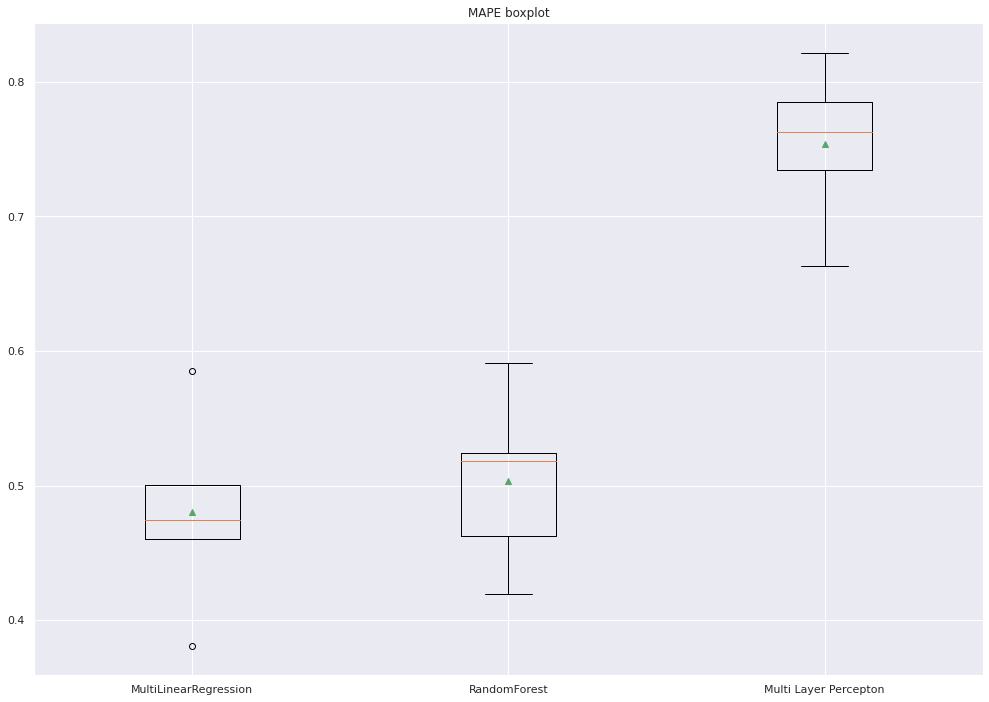

In [ ]:
Box_plott_Recall = list()
for i in range(len(resultados)):
    rr = resultados[i]['test_MAPE']
    
    Box_plott_Recall.append(rr)

plt.figure(2)
plt.title("MAPE boxplot")
plt.boxplot(Box_plott_Recall, labels=nombres, showmeans=True)
plt.show(block=True);

### **Ejercicio-8.**

Usando una búsqueda de malla con validación cruzada (GridSearchCV), busca los mejores 
hiperparámetros para el modelo MLP. Al menos deberás realizar la búsqueda en los 
hiperparámetros “hidden_layer_sizes”, “alpha” y “learning_rate_init”. Además aplica la validación 
cruzada con repeticiones (RepeatedKFold). Muestra los mejores hiperparámetros encontrados. 
 

In [ ]:
import warnings
from sklearn.metrics import mean_absolute_percentage_error

warnings.filterwarnings("ignore")

MAPEscorer = make_scorer(mi_MAPE, greater_is_better= False)


MLPmodel = MLPRegressor(max_iter=20000)
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

GSMLP = GridSearchCV(estimator=MLPmodel,
            param_grid=({'solver':['sgd'],'hidden_layer_sizes': [(100,2),(100,5),(100,10)], 
                         'alpha':[.001,.01,1] , 'learning_rate_init':[.0001,.001,.01]}),scoring= MAPEscorer)

GSMLPfit = GSMLP.fit(XtrainvalTransf,YtrainvalTransf.values.ravel())
print(GSMLP.best_params_)
print("Best MAPE scored=%0.3f):" % GSMLP.best_score_)

{'alpha': 1, 'hidden_layer_sizes': (100, 10), 'learning_rate_init': 0.001, 'solver': 'sgd'}
Best MAPE scored=-8.014):


### **Ejercicio-9.**

Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de 
los factores. Muestra un diagrama de barras de los resultados e incluye tus conclusiones. 

Feature: 0, Score: 0.21667
Feature: 1, Score: 0.40269
Feature: 2, Score: 0.04510
Feature: 3, Score: 0.05590
Feature: 4, Score: 0.02761
Feature: 5, Score: 0.01563
Feature: 6, Score: 0.06140
Feature: 7, Score: 0.50010
Feature: 8, Score: 0.01443
Feature: 9, Score: 0.04397


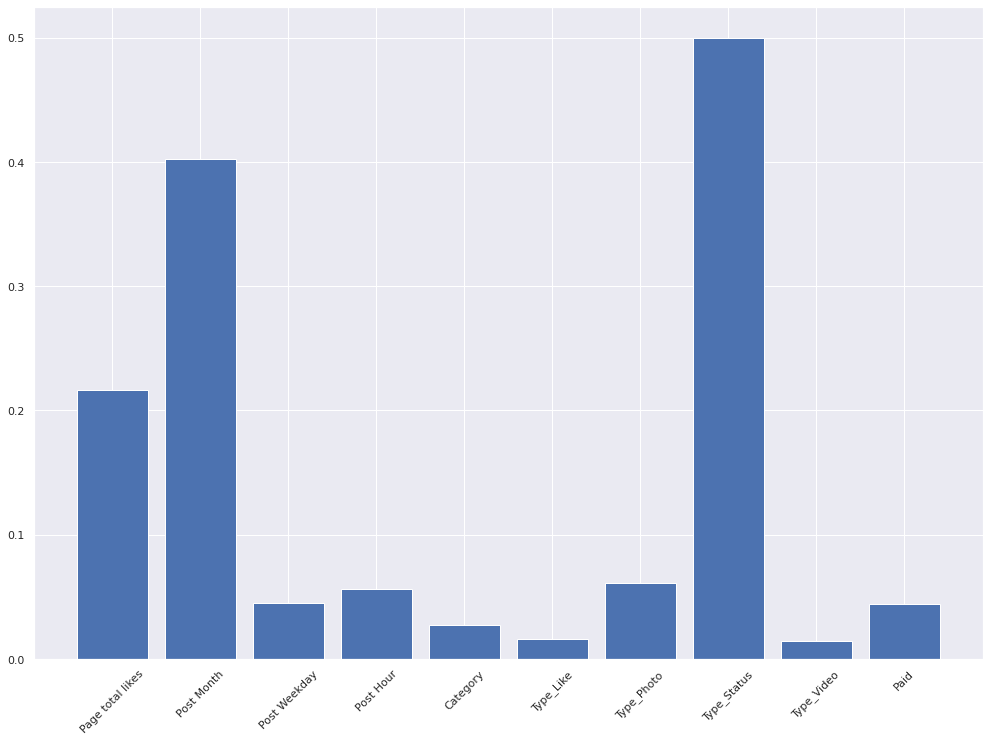

In [ ]:
from sklearn.inspection import permutation_importance


MAPEscorer = make_scorer(mean_absolute_percentage_error, greater_is_better= False)

Best_MLP = MLPRegressor(alpha = 1, 
                            max_iter=20000, 
                            hidden_layer_sizes= (100,5),
                            learning_rate_init=0.001,
                            solver = 'sgd'
                           )  

Best_MLP.fit(Xtraintransf, Ytraintransf)

importance = permutation_importance(Best_MLP, Xtraintransf, Ytraintransf, n_repeats=10)

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))

x = [x for x in range(len(importance['importances_mean']))]
y = importance['importances_mean']

plt.bar(x, y)
plt.xticks(x, New_Labels_X, rotation = 45)
plt.show()

In [ ]:
XtestFit = TransformColumns.fit(Xtest)
XtestTransf = pd.DataFrame(XtestFit.transform(Xtest))

ypred = pd.DataFrame(GSMLPfit.predict(XtestTransf))



YtestFit = TransformColumnsY.fit(ytest)
YtestTransf = pd.DataFrame(YtestFit.transform(ytest))


RMSE_final = float(mi_RMSE(YtestTransf,ypred))
MAE_final = float(mi_MAE(YtestTransf,ypred))
MAPE_final = float(mi_MAPE(YtestTransf,ypred))

print("Errores de red neuronal perceptron en dataset de prueba: ")
print('RMSE final:', RMSE_final)
print('MAE final:', MAE_final)
print('MAPE final:', MAPE_final)

Errores de red neuronal perceptron en dataset de prueba: 
RMSE final: 0.6239940960526532
MAE final: 0.4457749438707457
MAPE final: 7.477988051610803


### **Ejercicio-10.**

Repite el ejercicio 8 y 9 para el modelo de bosque aleatorio para buscar sus mejores 
hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más 
adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de 
factores con este modelo con un diagrama de barras. 

In [ ]:

import warnings
from sklearn.metrics import mean_absolute_percentage_error

warnings.filterwarnings("ignore")

MAPEscorer = make_scorer(mi_MAPE, greater_is_better= False)

RFmodel = RandomForestRegressor()
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

GSRF = GridSearchCV(estimator=RFmodel,
            param_grid=({'n_estimators': [5,10,20],
                         'criterion': ('squared_error', 'absolute_error', 'poisson'), 
                         'max_depth': [1,3,5,7,9], 
                         'min_samples_split':[2,4,6], 
                         'min_samples_leaf': [2,4,6]}),scoring= MAPEscorer)

GSRFfit = GSRF.fit(XtrainvalTransf,YtrainvalTransf.values.ravel())
print(GSRF.best_params_)
print("Best MAPE scored=%0.3f):" % GSMLP.best_score_)

{'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 10}
Best MAPE scored=-8.014):


Feature: 0, Score: 0.16786
Feature: 1, Score: 0.00123
Feature: 2, Score: 0.00076
Feature: 3, Score: 0.00093
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.03442
Feature: 6, Score: 0.00637
Feature: 7, Score: 0.51038
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00310


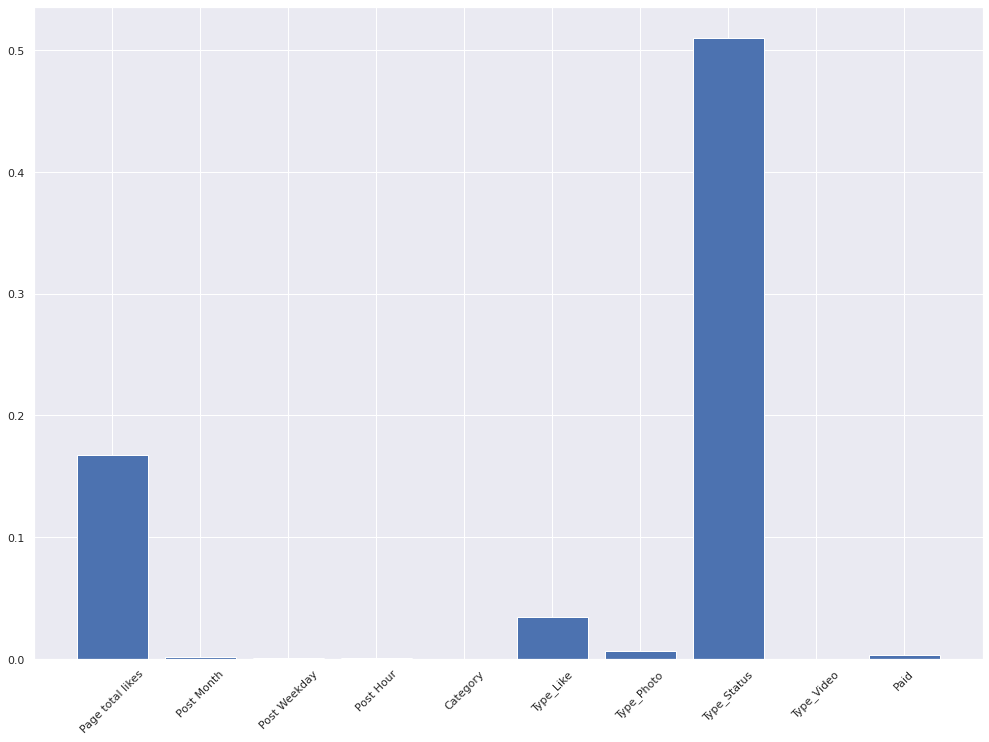

In [ ]:
# Una vez inicializado y entrenada la MLP, veamos qué factores considera más importantes:

Best_RF = RandomForestRegressor(n_estimators = 10, 
                            criterion= 'absolute_error',
                            max_depth = 3,
                            min_samples_leaf = 6,
                            min_samples_split=4,
                           )  


Best_RF.fit(Xtraintransf, Ytraintransf)

importance = permutation_importance(Best_RF, Xtraintransf, Ytraintransf, n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
x = [x for x in range(len(importance['importances_mean']))]
y = importance['importances_mean']

plt.bar(x, y)
plt.xticks(x, New_Labels_X, rotation = 45)
plt.show()

In [ ]:
XtestFit = TransformColumns.fit(Xtest)
XtestTransf = pd.DataFrame(XtestFit.transform(Xtest))

ypred = pd.DataFrame(GSRFfit.predict(XtestTransf))

#print(ypred)

YtestFit = TransformColumnsY.fit(ytest)
YtestTransf = pd.DataFrame(YtestFit.transform(ytest))

#print(YtestTransf)


print("Errores de Random Forrest en dataset de prueba: ")
# MSE-errores de test:
val_mse = mi_RMSE(YtestTransf,ypred)           
print("RMSE_val: ",train_mse)
# MAE-errores de test:
val_mae = mi_MAE(YtestTransf,ypred)          
print("MAE_val: ",train_mae)
# MAPE-errores de test:
val_mape = mi_MAPE(YtestTransf,ypred)          
print("MAPE_val: ",train_mape)

Errores de Random Forrest en dataset de prueba: 
RMSE_val:  0.7712940848944515
MAE_val:  0.5279104789131072
MAPE_val:  8.800067703029647


### **Ejercicio-11.**

Repite el ejercicio 8 y 9 para el modelo de regresión lineal múltiple para buscar sus mejores 
hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más 
adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de 
factores con este modelo con un diagrama de barras. 

In [ ]:
MAPEscorer = make_scorer(mi_MAPE, greater_is_better= False)
#MAPEscorer = make_scorer(mean_absolute_percentage_error, greater_is_better= False)

LRmodel = LinearRegression()
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

GSLR = GridSearchCV(estimator=LRmodel,
            param_grid=({'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False] }),scoring= MAPEscorer)

GSLRfit = GSLR.fit(XtrainvalTransf,YtrainvalTransf)
print(GSLR.best_params_)
print("Best MAPE scored=%0.3f):" % GSMLP.best_score_)

{'copy_X': True, 'fit_intercept': False, 'normalize': True}
Best MAPE scored=-8.014):


Feature: 0, Score: 0.17799
Feature: 1, Score: 0.48791
Feature: 2, Score: 0.00001
Feature: 3, Score: 0.00002
Feature: 4, Score: 0.00339
Feature: 5, Score: 0.14524
Feature: 6, Score: 0.05347
Feature: 7, Score: 0.23210
Feature: 8, Score: 0.00721
Feature: 9, Score: 0.00914


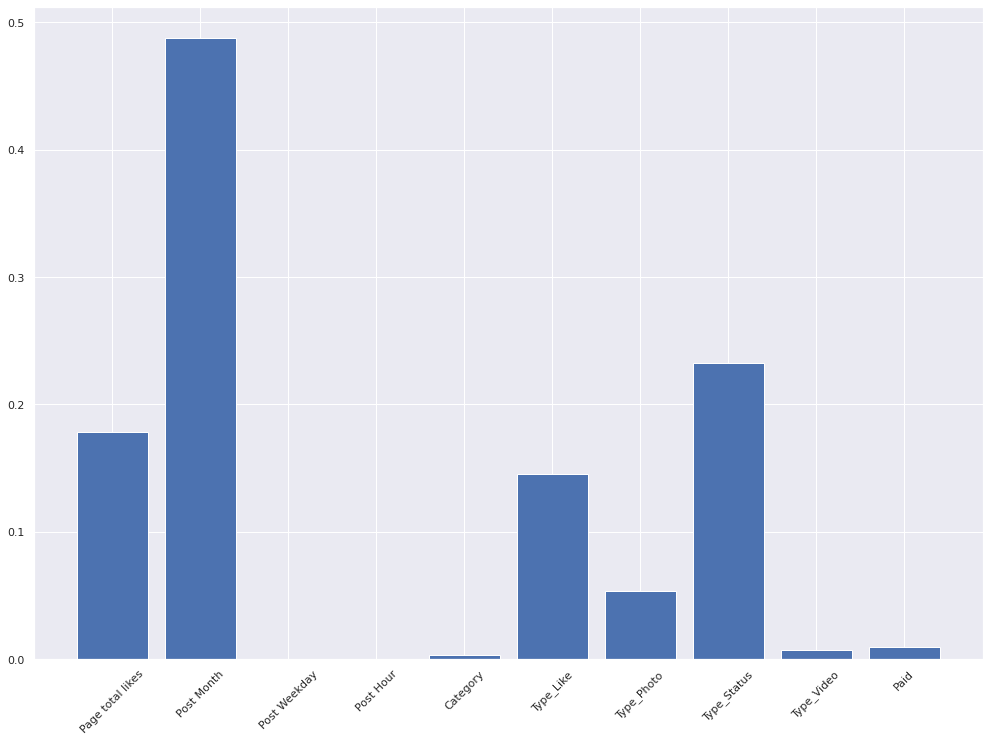

In [ ]:
from distutils.file_util import copy_file
from sklearn.inspection import permutation_importance

#kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
#MAPEscorer = make_scorer(mi_MAPE, greater_is_better= False)
MAPEscorer = make_scorer(mi_MAPE, greater_is_better= False)

Best_LR = LinearRegression(copy_X=True, 
							fit_intercept=True, 
							normalize=False)  

Best_LR.fit(Xtraintransf, Ytraintransf)

importance = permutation_importance(Best_LR, Xtraintransf, Ytraintransf, n_repeats=20)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
x = [x for x in range(len(importance['importances_mean']))]
y = importance['importances_mean']

plt.bar(x, y)
plt.xticks(x, New_Labels_X, rotation = 45)
plt.show()

In [ ]:
XtestFit = TransformColumns.fit(Xtest)
XtestTransf = pd.DataFrame(XtestFit.transform(Xtest))

ypred = pd.DataFrame(GSLRfit.predict(XtestTransf))

#print(ypred)

YtestFit = TransformColumnsY.fit(ytest)
YtestTransf = pd.DataFrame(YtestFit.transform(ytest))

#print(YtestTransf)

RMSE_final = float(mi_RMSE(YtestTransf,ypred))
MAE_final = float(mi_MAE(YtestTransf,ypred))
MAPE_final = float(mi_MAPE(YtestTransf,ypred))

print("Errores de Regresion Lineal Multiple en dataset de prueba: ")
print('RMSE final:', RMSE_final)
print('MAE final:', MAE_final)
print('MAPE final:', MAPE_final)

Errores de Regresion Lineal Multiple en dataset de prueba: 
RMSE final: 0.6331431560864288
MAE final: 0.4710224808912672
MAPE final: 7.885396374808673


### **Ejercicio-12.**

Compara tus resultados con los obtenidos por los autores del artículo de Moro-Rita-Vala con 
respecto a MAPE. Incluye tus conclusiones finales de la actividad. 

El articulo de Moro - Rita - Vala muestra un MAPE del 26.9% a diferencia del que hemos realizado de un 7.88%, osea hubo un 70% de mejora en cuanto al error porcentual absoluto medio.

Pero la diferencia fue el uso de las variables, en el articulo se usan las variables de entrada vs "Life time Post Consumers" , donde la relevancia es la siguiente:

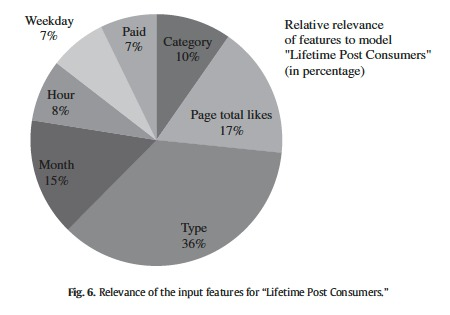

Mientras que en el modelo que hemos desarrollado las variables de entrada fueron las mismas siete vs "Lifetime people who have liked your page and engaged with your post", y ádemas la relevancia cambió como se observa en la siguiente figura:

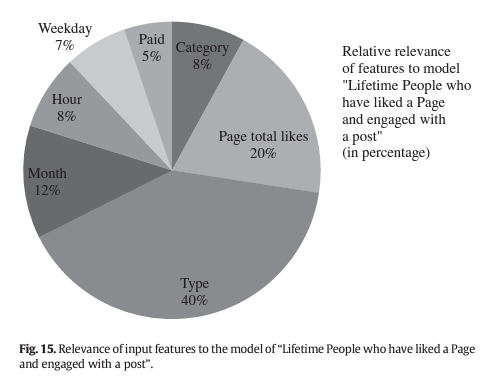

Por último la mayor diferencia la ha realizado el modelo, en el articulo se ha trabajado con maquina de vector, mientras que en este trabajo nosotros lo hemos hecho con una Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP),lo cual ha hecho que el error disminuya , siendo un modelo menos subentrenado. 



###  **Fin de la Actividad de la semana 7.**